In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Time Series Analysis/Holt Winter/Holt-winter_main_dailysales.csv")
df.shape

(704, 2)

In [3]:
df.head(3)

,date,sales
0,01-Jan-18,477.0
1,02-Jan-18,365.0
2,03-Jan-18,442.0


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Time Series Analysis/Holt Winter/Holt-winter_main_dailysales.csv",parse_dates=['date'],index_col=['date'])
df.shape

(704, 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 704 entries, 2018-01-01 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   704 non-null    float64
dtypes: float64(1)
memory usage: 11.0 KB


In [5]:
df.head(2)

,sales
date,
2018-01-01,477.0
2018-01-02,365.0


**There can be more entries of one day**

In [7]:
df=df.groupby('date').sum()
df.shape
# shape is one less than which shows that there is 2 values

(703, 1)

In [8]:
#daily> monthyly
# how to aggregate the date we take the sum or the mean?
df=df.resample(rule='MS').sum() # rule & aggregation parameter

In [9]:
df.head(2)

,sales
date,
2018-01-01,9035.0
2018-02-01,9571.0


**It contains lower trend and also contains seasonality regular periodic **

<Axes: xlabel='date'>

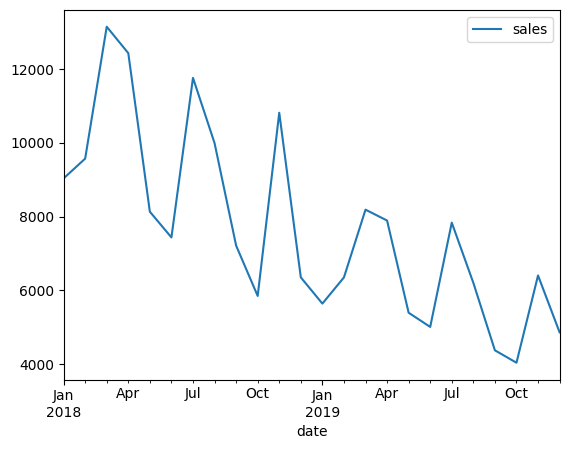

In [10]:
df.plot()

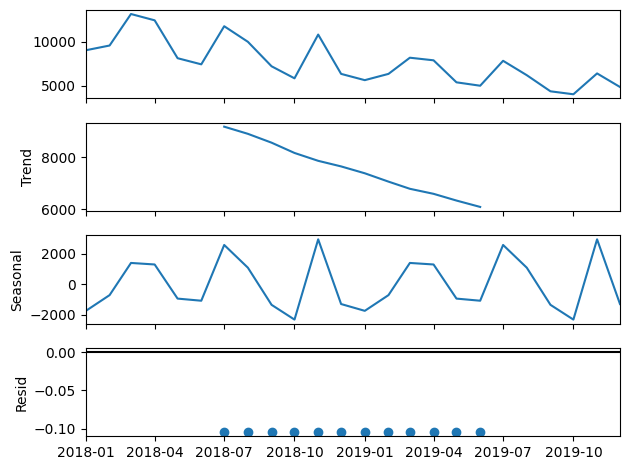

In [12]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df,model='additive').plot();
# We have to implement HOLT'S WINTER EXPONENTIAL SMOOTHING model where we have to explain nature of trend and seasonality
# if trend is additive or multiplicative and same for seasonality
# From Decomposition , it is clear that it contains additive trend because it is straight line
# and seasonality is multiplicative because it's magnitude is varying and it does n't matter if it is in upward or downward


**We don't need to convert make it stationary because HOLT Method easily handle the trend and seasonality Lets separate into train and test**

In [14]:
# dataset is on month basis
train=df[:19] #till Jul19
test=df[19:] # from aug19
train

,sales
date,
2018-01-01,9035.00
2018-02-01,9571.00
2018-03-01,13143.00
2018-04-01,12427.00
2018-05-01,8133.00
2018-06-01,7437.00
2018-07-01,11758.00
2018-08-01,9992.00
2018-09-01,7216.00


**Step 5: Holt Winters Model**

In [15]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwmodel=ExponentialSmoothing(train.sales,trend='add', seasonal='mul', seasonal_periods=4).fit()


In [16]:
test_pred=hwmodel.forecast(5)

In [17]:
test_pred

2019-08-01    6002.745942
2019-09-01    4162.911344
2019-10-01    3961.802154
2019-11-01    5945.097529
2019-12-01    4877.939702
Freq: MS, dtype: float64

<Axes: xlabel='date'>

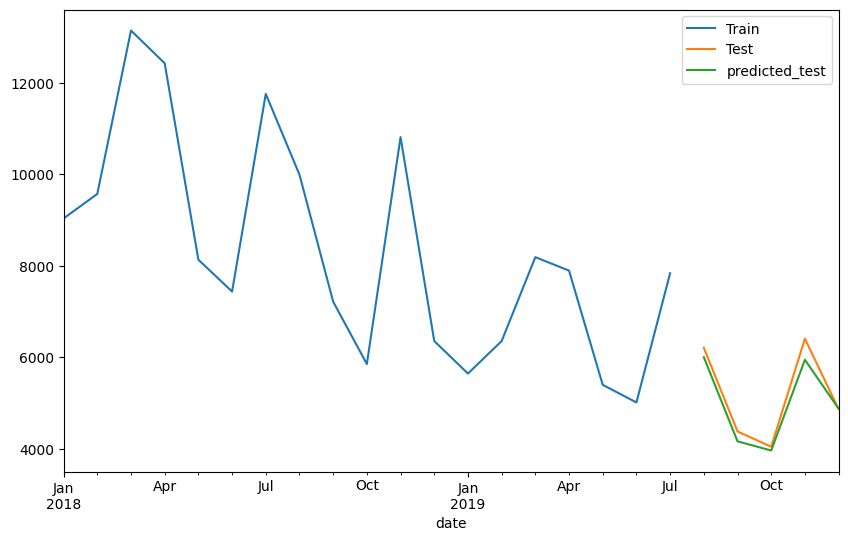

In [18]:
train['sales'].plot(legend=True, label='Train', figsize=(10,6))
test['sales'].plot(legend=True, label='Test')

test_pred.plot(legend=True, label='predicted_test')

We can clearly see that it is effecitively capturing the trend and seasonality without doing too much effort as we have to do in ARIMA for checking stationary and making stationnary and also calculate the value p,d,q which is AR , I ,MA value

**Evaluation**

In [19]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test,test_pred))
658.981285729108
df.sales.mean(), np.sqrt(df.sales.var())

(7665.204166666666, 2549.757117414906)

In [20]:
final_model=ExponentialSmoothing(df.sales,trend='add', seasonal='mul', seasonal_periods=4).fit()
pred=final_model.forecast(4)
pred

2020-01-01    3532.741778
2020-02-01    3330.571032
2020-03-01    4975.904975
2020-04-01    4032.122902
Freq: MS, dtype: float64

<Axes: xlabel='date'>

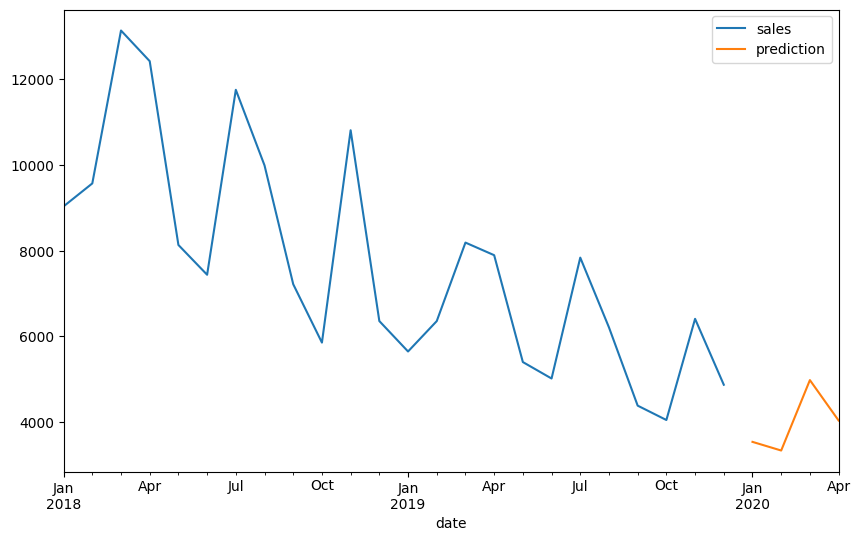

In [21]:
df['sales'].plot(legend=True, label='sales', figsize=(10,6))
pred.plot(legend=True, label='prediction')